# Process NHL Player College 

Data cleaning process largely follows

* NHL player-level statistics from processed table using API using this repository's code
* NHL-college player records are from [College Hockey Inc.](https://collegehockeyinc.com/2021-22-alums-nhl.php). Rotate out the URL years to get historical records.

![this process](diagram_headline.png)

Not all college players are accounted for, who maybe reserve players or data not able to be matched. At the time of the initial analysis 1/26/2024, the match rate is about $\frac{2,119}{3,438}\approx 61.6\%$

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import json

import matplotlib.pyplot as plt

cwd = os.getcwd()
cwd_git = os.path.dirname(os.path.dirname(os.path.dirname(cwd)))

# Location of the data
#   It will be your data location
with open(cwd_git + "/credentials.json") as f:
    loc = json.load(f)
# Replace with where you collect all data
cwd_data = loc["credentials"]["server"]
cwd_data_college = cwd_data + "nhl/data_playercollege"

# For the first time, run the data processing
#%run -i 'player_college_matching.py'

In [2]:
dfin = pd.read_csv(cwd_data + "nhl/data_gamelvl/processed/2022cum_player_collegematch.csv")

# Analysis

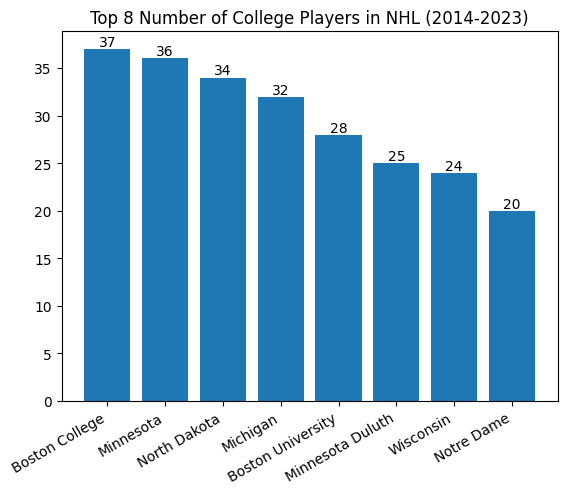

In [3]:
# Top 10 production college? need college column
tab_count = dfin.groupby('college').id_player.nunique().reset_index()
templot = tab_count.sort_values(by='id_player',ascending=False).head(8)

# Include the time-on-ice (median) contribution
# Exclude goalie here (which would be ~ 60 mins)
tempdf = dfin.loc[dfin.gamemin < 30,:]
tab_count = tempdf.groupby('college').gamemin.median().reset_index()
templot = pd.merge(templot,tab_count, on='college', how='left')

fig, ax = plt.subplots()
plt.bar(templot.college, templot.id_player)

ax.bar_label(ax.containers[0], label_type='edge')

plt.title("Top 8 Number of College Players in NHL (2014-2023)")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.show()

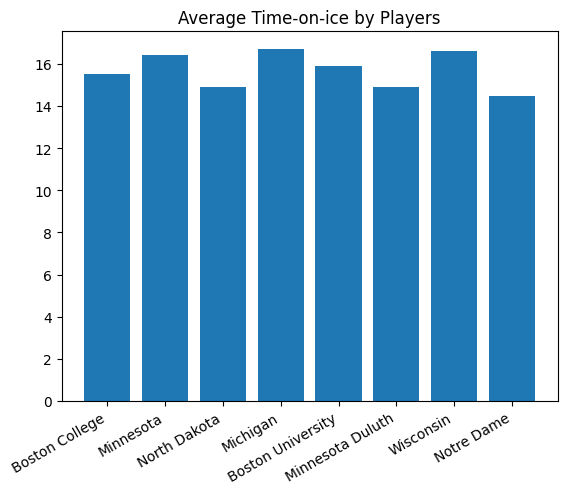

In [4]:
fig, ax = plt.subplots()
plt.bar(templot.college, templot.gamemin)

plt.title("Average Time-on-ice by Players")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.show()

<Axes: title={'center': 'Rookie Debut by College (Top 8)'}, xlabel='season'>

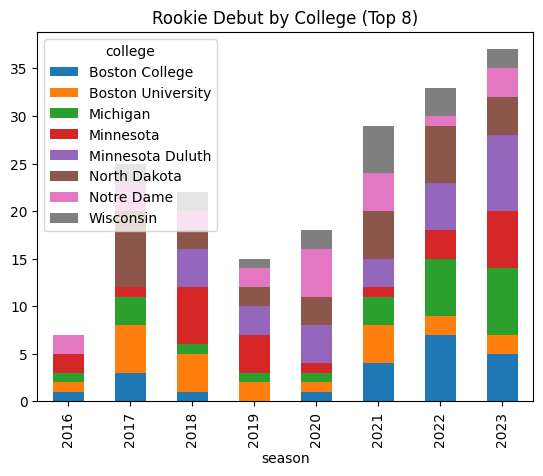

In [67]:
# Observing rookie debut
rookie = dfin.loc[dfin.rookie==True, :]\
    .groupby(['season','college'])\
    .id_player.count().reset_index()
rookie = rookie.loc[rookie.college.isin(templot.college)]

tab_rookie = rookie.pivot_table(index="season", values="id_player", columns="college").reset_index()

tab_rookie.plot(x='season', kind='bar', stacked=True,
        title='Rookie Debut by College (Top 8)')

In [10]:
import seaborn as sns

## Evaluating College Tenure and Production Changes
Overall, I observe that the debut/rookie season, more game time and productions are observed for those with shorter college tenure, mostly driven by highly touted/drafted player leaving college earlier in the career. 

Evaluating the non-rookie seasons (after experiences), the game time and production is consistent across players with different college tenure. This means that the production of players sorted and filtered out during their NHL debut and subsequent seasons. This also implies that leaving college tenure early is not an indiciation of better production in NHL longer-run.

/tmp/ipykernel_3539/3672728936.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ax=axes[1], data=dfin.loc[dfin.rookie==True], x="goals",


Text(0.5, 1.0, 'non-Rookie Season')

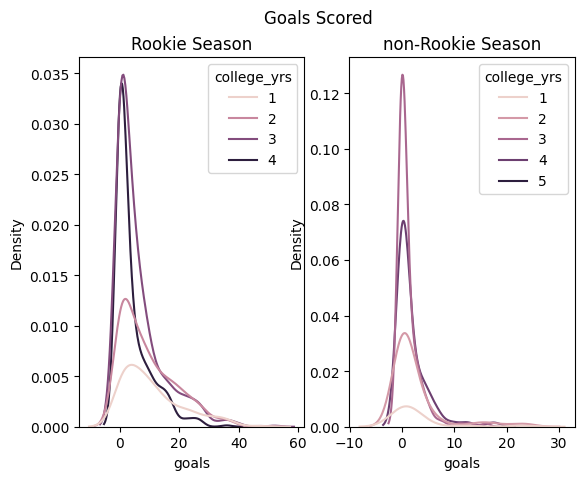

In [26]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Goals Scored')
sns.kdeplot(ax=axes[0], data=dfin.loc[dfin.rookie==False], x="goals", 
            hue="college_yrs")
axes[0].set_title("Rookie Season")
sns.kdeplot(ax=axes[1], data=dfin.loc[dfin.rookie==True], x="goals", 
            hue="college_yrs")
axes[1].set_title("non-Rookie Season")

/tmp/ipykernel_3539/3703340417.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ax=axes[1], data=dfin.loc[dfin.rookie==True], x="gamemin",


Text(0.5, 1.0, 'non-Rookie Season')

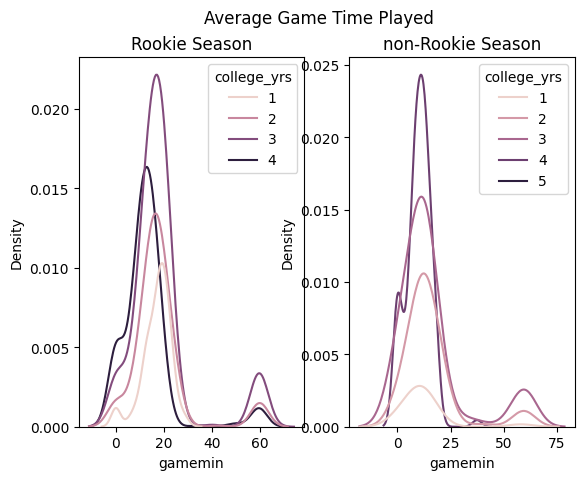

In [24]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Average Game Time Played')
sns.kdeplot(ax=axes[0], data=dfin.loc[dfin.rookie==False], x="gamemin", 
            hue="college_yrs")
axes[0].set_title("Rookie Season")
sns.kdeplot(ax=axes[1], data=dfin.loc[dfin.rookie==True], x="gamemin", 
            hue="college_yrs")
axes[1].set_title("non-Rookie Season")

## Production by Draft Order
Higher draft pick players (1st round player went throuch college) are more likely to produce goals then their peers. However, as their career matures, the difference goes away. Again emphasizing that the player roaster selection is filtered and less depended on college tenure and drafts pick of the college players.

Text(0.5, 1.0, 'non-Rookie Season')

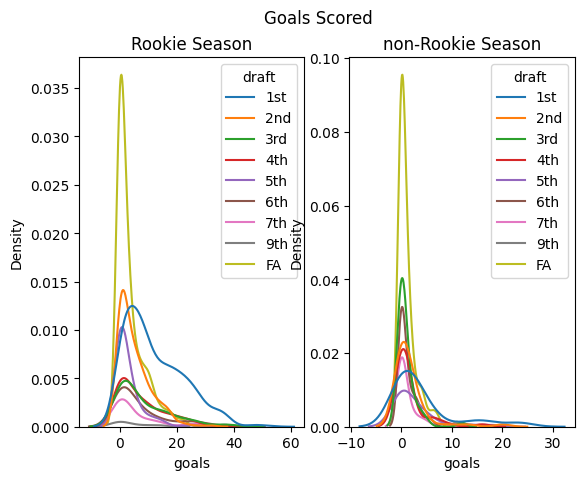

In [36]:
idx_order = sorted(dfin.draft.unique())
fig, axes = plt.subplots(1, 2)
fig.suptitle('Goals Scored')
sns.kdeplot(ax=axes[0], data=dfin.loc[dfin.rookie==False], x="goals", 
            hue="draft", hue_order=idx_order)
axes[0].set_title("Rookie Season")
sns.kdeplot(ax=axes[1], data=dfin.loc[dfin.rookie==True], x="goals", 
            hue="draft", hue_order=idx_order)
axes[1].set_title("non-Rookie Season")

Text(0.5, 1.0, 'non-Rookie Season')

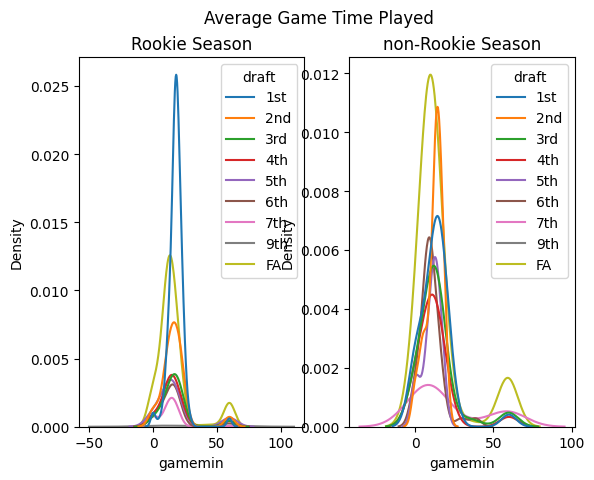

In [37]:
idx_order = sorted(dfin.draft.unique())
fig, axes = plt.subplots(1, 2)
fig.suptitle('Average Game Time Played')
sns.kdeplot(ax=axes[0], data=dfin.loc[dfin.rookie==False], x="gamemin", 
            hue="draft", hue_order=idx_order)
axes[0].set_title("Rookie Season")
sns.kdeplot(ax=axes[1], data=dfin.loc[dfin.rookie==True], x="gamemin", 
            hue="draft", hue_order=idx_order)
axes[1].set_title("non-Rookie Season")